In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
%matplotlib inline

In [9]:
# Manual
# load data
df = pd.read_csv("train.csv.zip", index_col="id")
# get continous variables
df_cont = df[[c for c in df.columns if "cont" in c]]
df_cont.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,
1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


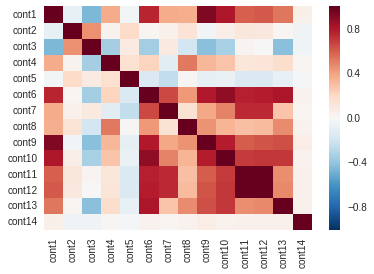

In [10]:
# check if the variables are correlated
sns.heatmap(df_cont.corr())
# get covariance and eigen -values/-vectors
cov = df_cont.cov()
eigvals, eigvecs = np.linalg.eigh(cov) # linalg.eigh returns values/vecs in reverse order
eigvals = eigvals[::-1]
eigvecs = eigvecs[:,::-1]
# whiten data
lambda_sqrt_inverse = np.linalg.inv(np.sqrt(np.diag(eigvals)))
U = eigvecs
df_cont_cent = df_cont.sub(df_cont.mean())
df_cont_white = np.dot(np.dot(lambda_sqrt_inverse, U.T), df_cont_cent.T)
df_cont_white = pd.DataFrame(df_cont_white.T, index=df_cont.index ,columns=df_cont.columns)

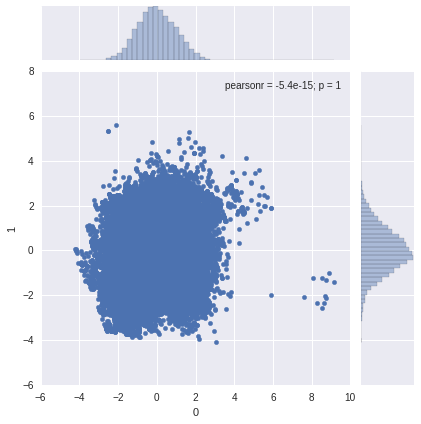

In [45]:
# plotting data with 2 PCAs
df_pca2 = df_cont_white.dot(eigvecs[:,:2])
sns.jointplot(x=0, y=1, data=df_pca2)

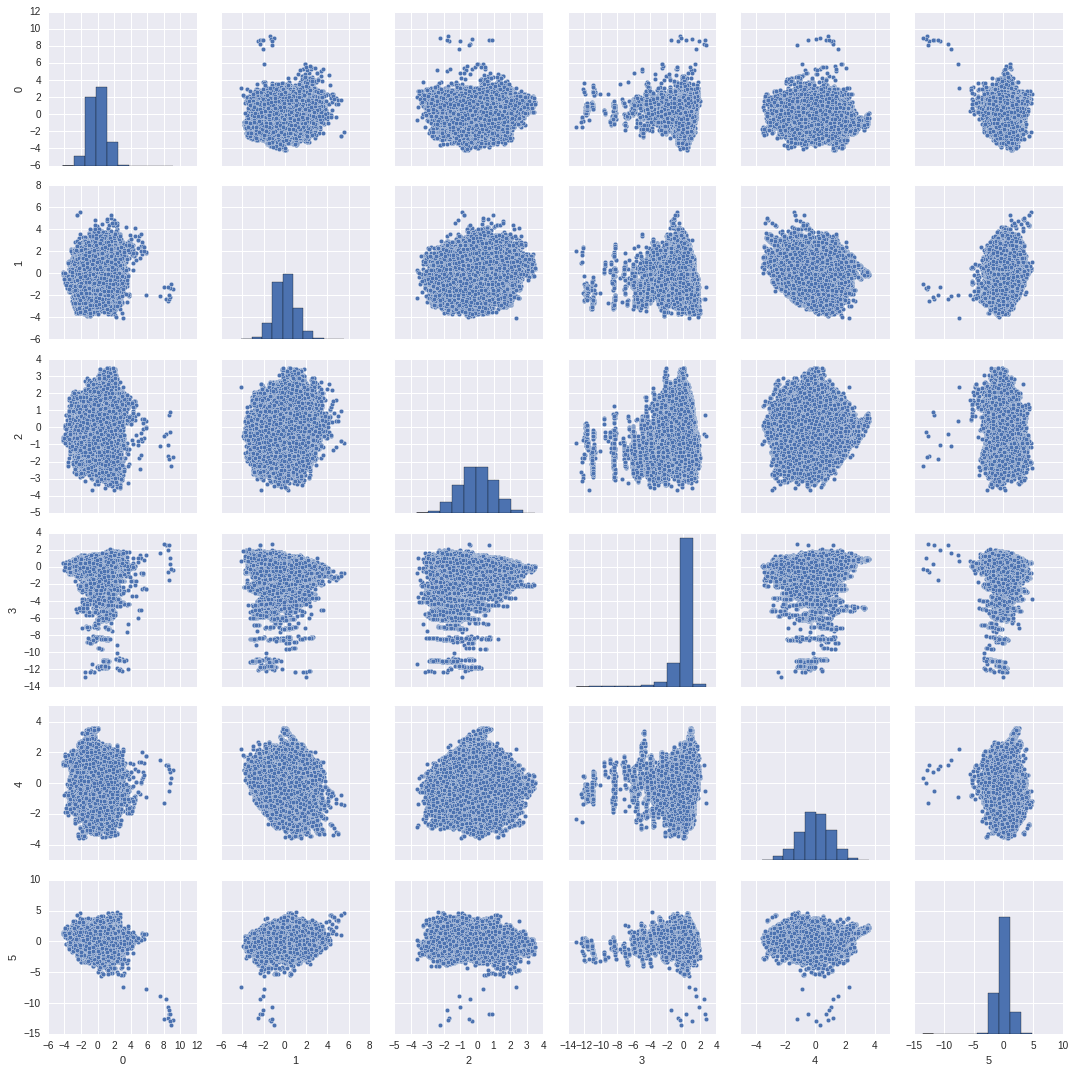

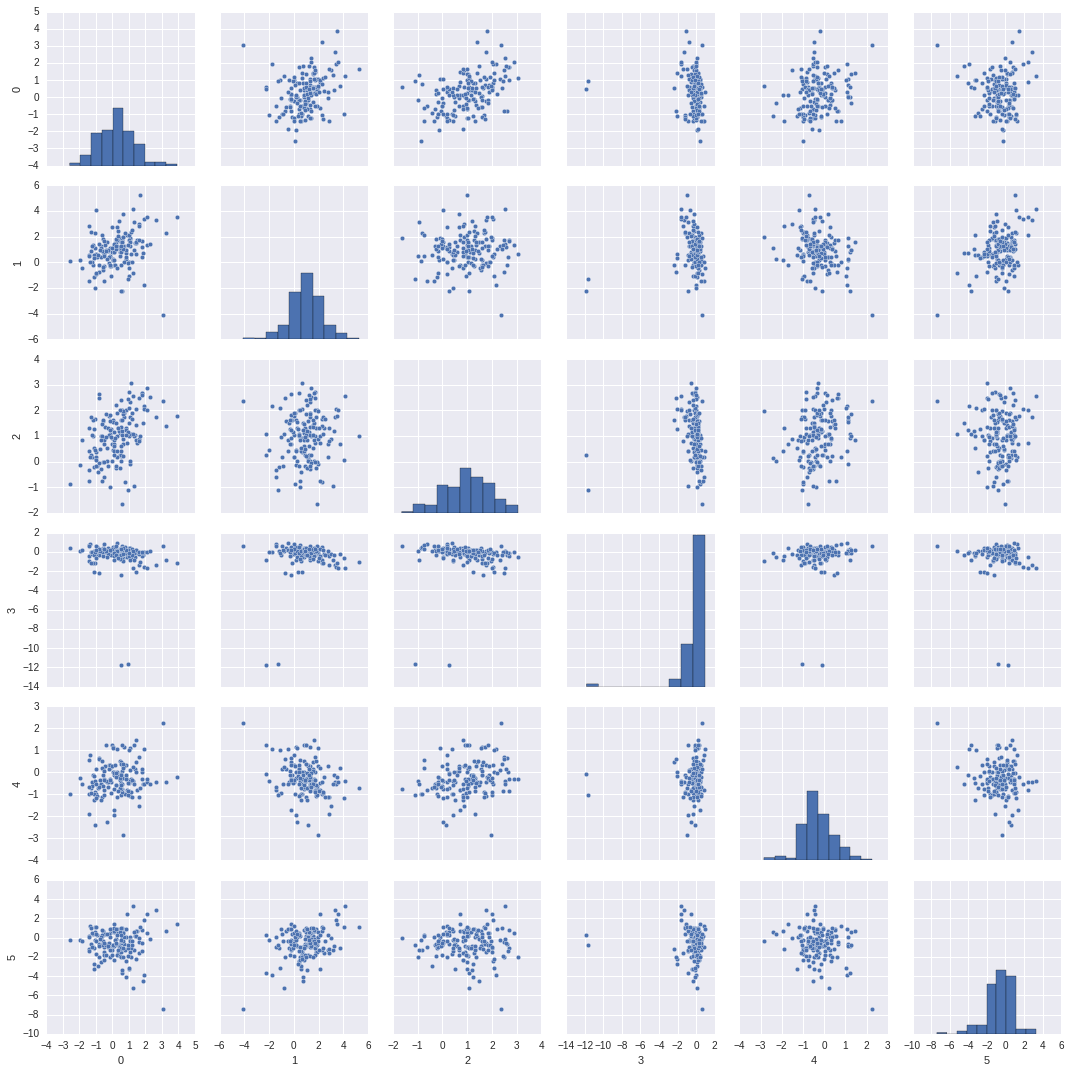

In [46]:
# pairplot of first 6 PCs
df_pca6 = df_cont_white.dot(eigvecs[:,:6])
sns.pairplot(df_pca6)
highloss_idx = df.loc[df['loss'] >= 25000].index.tolist()
sns.pairplot(df_pca6.ix[highloss_idx,:])

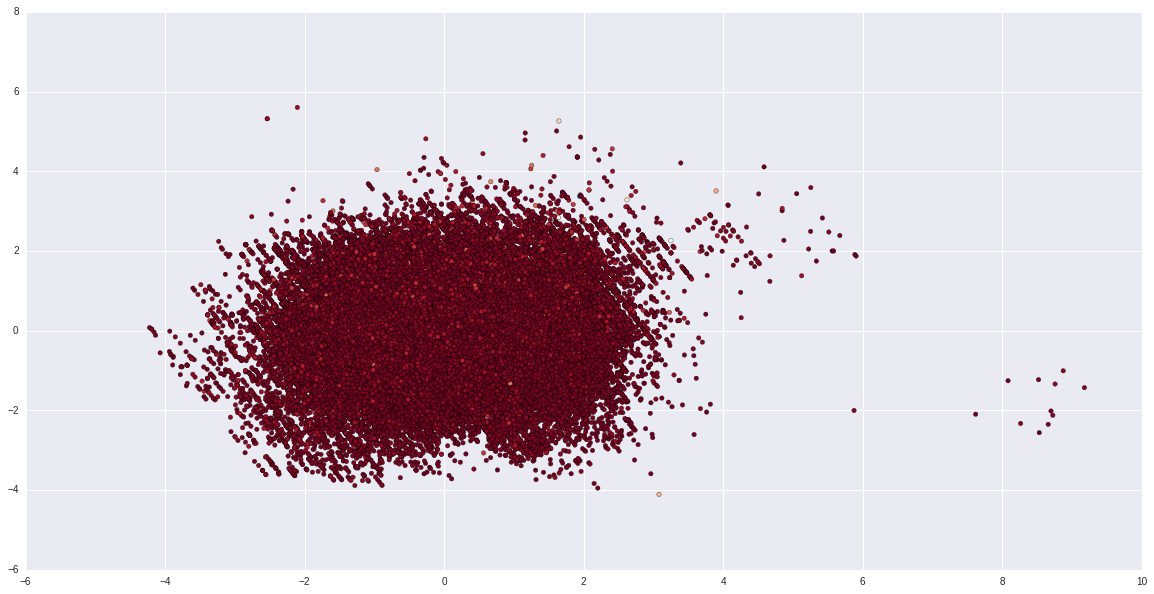

In [30]:
plt.figure(figsize=(20,10))
plt.scatter(x=df_pca2.ix[:,0], y=df_pca2.ix[:,1], c=df['loss'], cmap='RdBu')
plt.show()

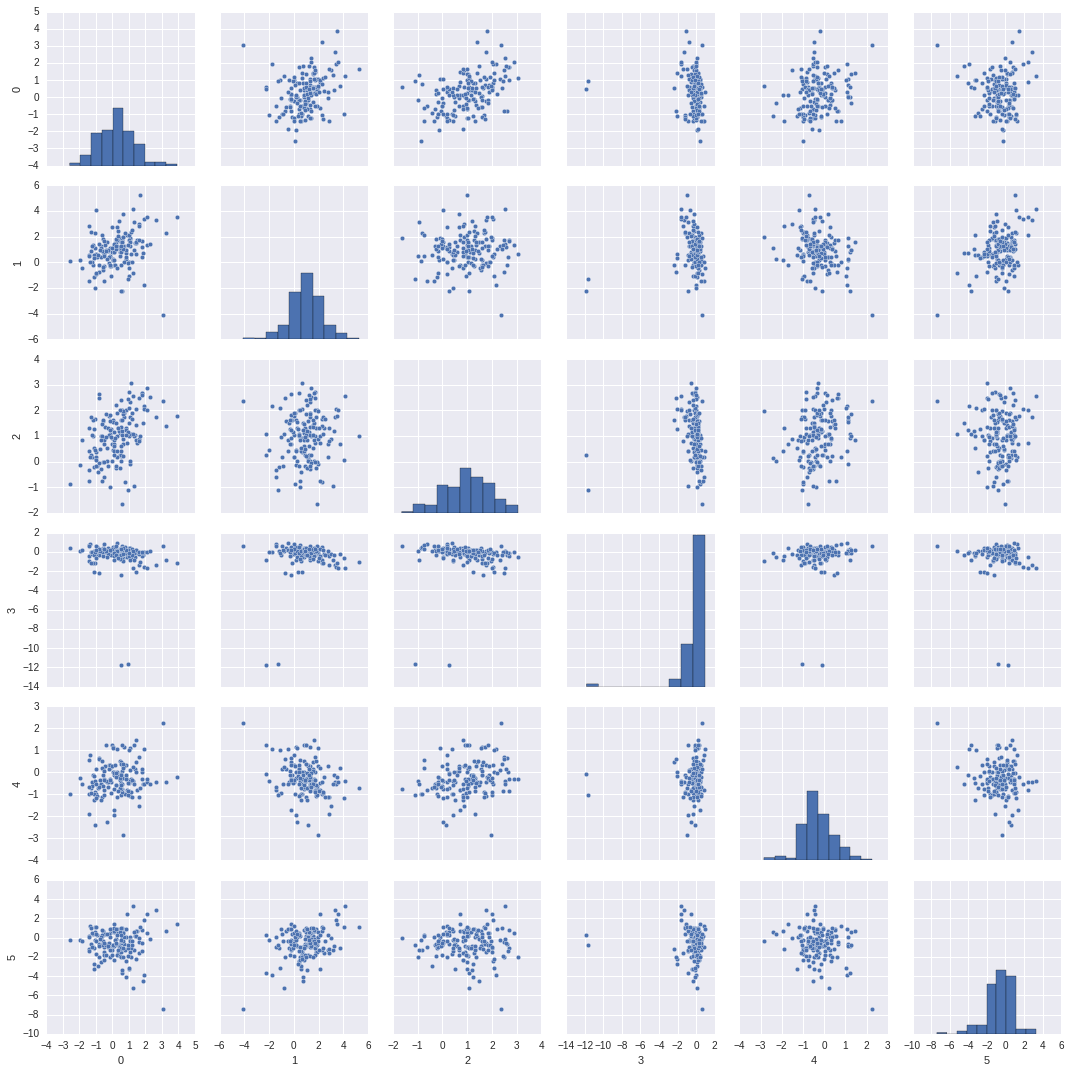

In [41]:
plt.figure(figsize=(20,10))
plt.scatter(x=df_pca6.ix[highloss_idx,2], y=df_pca6.ix[highloss_idx,3], c='g')
plt.show()
sns.jointplot(x=2, y=3, data=df_pca6)

In [7]:
kpca = KernelPCA(n_components=6, kernel='rbf')
df_cont_kpca = kpca.fit_transform(df_cont)
df_cont_kpca.shape

MemoryError: 